In [33]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../Data/products_4.csv')

In [34]:
df_rj = df[df['Proj_State'] == 'RJ']
df_rj.drop(columns=['Prod_Desc', 'Sub_Name', 'ID_Proj', 'Proj_Name', 'Proj_City'], inplace=True)
df_rj.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_7372\3942908168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rj.drop(columns=['Prod_Desc', 'Sub_Name', 'ID_Proj', 'Proj_Name', 'Proj_City'], inplace=True)


,Cat_Name,BOM_Quant,Proj_State,Proj_Date
20,Madeiras,500.0,RJ,2023-09-06
22,Madeiras,500.0,RJ,2023-09-06
52,Infraestrutura,16.0,RJ,2023-09-20
53,Infraestrutura,16.0,RJ,2023-09-20
68,Infraestrutura,15.0,RJ,2023-09-22


In [35]:
df_rj.isnull().sum()

Cat_Name      0
BOM_Quant     0
Proj_State    0
Proj_Date     0
dtype: int64

### Criando um dataset para cada categoria que sera modelada

In [36]:
df_rj_ferragens = df_rj[df_rj['Cat_Name'] == 'Ferragens']
df_rj_construcao_civil = df_rj[df_rj['Cat_Name'] == 'Construção Civil']
df_rj_materiais_eletricos = df_rj[df_rj['Cat_Name'] == 'Materiais Elétricos']

### Agrupamento e Soma de BOM_Quant por Data

In [37]:
df_rj_ferragens_grouped = df_rj_ferragens.groupby('Proj_Date').agg({'BOM_Quant': 'sum'}).reset_index()
df_rj_construcao_civil_grouped = df_rj_construcao_civil.groupby('Proj_Date').agg({'BOM_Quant': 'sum'}).reset_index()
df_rj_materiais_eletricos_grouped = df_rj_materiais_eletricos.groupby('Proj_Date').agg({'BOM_Quant': 'sum'}).reset_index()

In [38]:
n_duplicates = df_rj_ferragens_grouped.duplicated().sum()
print(f'Número de duplicados: {n_duplicates}')

n_duplicates = df_rj_construcao_civil_grouped.duplicated().sum()
print(f'Número de duplicados: {n_duplicates}')

n_duplicates = df_rj_materiais_eletricos_grouped.duplicated().sum()
print(f'Número de duplicados: {n_duplicates}')


Número de duplicados: 0
Número de duplicados: 0
Número de duplicados: 0


In [39]:
# Verificando se há valores zero ou negativos
print(df_rj_ferragens_grouped[df_rj_ferragens_grouped['BOM_Quant'] <= 0].shape[0])
print(df_rj_construcao_civil_grouped[df_rj_construcao_civil_grouped['BOM_Quant'] <= 0].shape[0])
print(df_rj_materiais_eletricos_grouped[df_rj_materiais_eletricos_grouped['BOM_Quant'] <= 0].shape[0])


0
0
0


In [40]:
df_rj_ferragens_grouped.to_csv('../Data/PreparedData/RJ/RJ_FERRAGENS.csv', index=False)
df_rj_construcao_civil_grouped.to_csv('../Data/PreparedData/RJ/RJ_CONSTRUCAO_CIVIL.csv', index=False)
df_rj_materiais_eletricos_grouped.to_csv('../Data/PreparedData/RJ/RJ_MATERIAIS_ELETRICOS.csv', index=False)

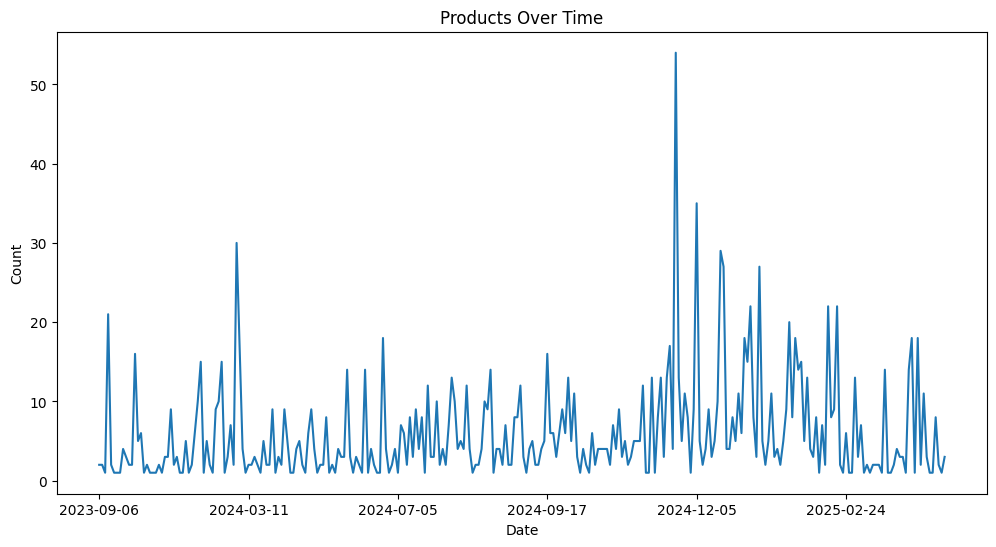

In [41]:
plt.figure(figsize=(12, 6))
df_rj.groupby('Proj_Date').size().plot()
plt.title('Products Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

### Criando datasets semanais

In [42]:
df_rj_ferragens_grouped['Proj_Date'] = pd.to_datetime(df_rj_ferragens_grouped['Proj_Date'])  
df_rj_construcao_civil_grouped['Proj_Date'] = pd.to_datetime(df_rj_construcao_civil_grouped['Proj_Date'])  
df_rj_materiais_eletricos_grouped['Proj_Date'] = pd.to_datetime(df_rj_materiais_eletricos_grouped['Proj_Date'])  
  
df_rj_ferragens_grouped.set_index('Proj_Date', inplace=True)  
df_rj_construcao_civil_grouped.set_index('Proj_Date', inplace=True)  
df_rj_materiais_eletricos_grouped.set_index('Proj_Date', inplace=True) 

In [43]:
df_rj_ferragens_semanal = df_rj_ferragens_grouped.resample('W').sum().reset_index()  
df_rj_construcao_civil_semanal = df_rj_construcao_civil_grouped.resample('W').sum().reset_index()  
df_rj_materiais_eletricos_semanal = df_rj_materiais_eletricos_grouped.resample('W').sum().reset_index() 


df_rj_ferragens_semanal.to_csv('../Data/PreparedData/RJ/Semanal/RJ_FERRAGENS.csv', index=False)
df_rj_construcao_civil_semanal.to_csv('../Data/PreparedData/RJ/Semanal/RJ_CONSTRUCAO_CIVIL.csv', index=False)
df_rj_materiais_eletricos_semanal.to_csv('../Data/PreparedData/RJ/Semanal/RJ_MATERIAIS_ELETRICOS.csv', index=False)

### Criando datasets quinzenais

In [44]:
df_rj_ferragens_quinzenal = df_rj_ferragens_grouped.resample('15D').sum().reset_index()  
df_rj_construcao_civil_quinzenal = df_rj_construcao_civil_grouped.resample('15D').sum().reset_index()  
df_rj_materiais_eletricos_quinzenal = df_rj_materiais_eletricos_grouped.resample('15D').sum().reset_index()  

df_rj_ferragens_quinzenal.to_csv('../Data/PreparedData/RJ/Quinzenal/RJ_FERRAGENS.csv', index=False)
df_rj_construcao_civil_quinzenal.to_csv('../Data/PreparedData/RJ/Quinzenal/RJ_CONSTRUCAO_CIVIL.csv', index=False)
df_rj_materiais_eletricos_quinzenal.to_csv('../Data/PreparedData/RJ/Quinzenal/RJ_MATERIAIS_ELETRICOS.csv', index=False)